## Employee Attrition Prediction  
**Vinay Nagaraj**

### Overview

For an organization to perform successfully, it is important that the employer and the employee have a good relationship and understanding. It is known that if a strong relationship is in place employees will be more productive, more efficient, create less conflict and will be more loyal. Attrition can make a big dent in your organization’s bottom line as well as its culture.  

When an employee decides to quit, there will be a lot of challenges for the employer. It will impact their productivity, revenue, experience and also time invested in training the employee. So, it is important for employers to understand why employees are leaving the company.  

Through this project we will identify the factors that lead to employee attrition and build a classifier model that would help an organization in predicting the employees that can leave the organization so that they can work with employees and take corrective measures to reduce the attrition problem related to employees leaving the organization.  

As part of this project, I will be using the dataset [Kaggle](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) which is a fictional data set created by IBM data scientists. I am planning to use this data to train the model as part of this project.

In [1]:
# Load necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean, std
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import auc, make_scorer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, validation_curve, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss, average_precision_score, make_scorer

In [2]:
# Read our data
employee_attrition_data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
# Check the dimension of the data frame
print("The dimension of the table is: ", employee_attrition_data.shape)

The dimension of the table is:  (1470, 35)


In [4]:
# Lets look at some sample records to understand the data
print(employee_attrition_data.head(4).T)

                                        0                       1  \
Age                                    41                      49   
Attrition                             Yes                      No   
BusinessTravel              Travel_Rarely       Travel_Frequently   
DailyRate                            1102                     279   
Department                          Sales  Research & Development   
DistanceFromHome                        1                       8   
Education                               2                       1   
EducationField              Life Sciences           Life Sciences   
EmployeeCount                           1                       1   
EmployeeNumber                          1                       2   
EnvironmentSatisfaction                 2                       3   
Gender                             Female                    Male   
HourlyRate                             94                      61   
JobInvolvement                    

In [5]:
# Check the types of each feature
employee_attrition_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
# Check for any missing values
employee_attrition_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
employee_attrition_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
# Understand the categorical data in our dataset
for column in employee_attrition_data.columns:
  if employee_attrition_data[column].dtype == object:
    print("{} : {}".format(str(column), str(employee_attrition_data[column].unique())))
    print(employee_attrition_data[column].value_counts())
    print("-----------------------------------------------------\n\n")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
-----------------------------------------------------


BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
-----------------------------------------------------


Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
-----------------------------------------------------


EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
-----------------------------------------------------


Gender : ['Female' 'Male']
Male      882
Female

Below are our observations so far:\
1) Input data has 1470 records and 35 features.\
2) There is no missing values.\
3) EmployeeCount feature does not seem to hold much importance since all the records have a value of '1'.\
4) StandardHours feature also does not seem to hold much importance since all records have a value of '80'.\
5) Over18 feature also does not seem to hold much importance since all records have a value of 'Y'\
6) EmployeeNumber feature is a unique number provided to each employee and it will not be useful for us in our predictions. 

In [9]:
# Drop the 4 features which we are identified as unimportant.
employee_attrition_data = employee_attrition_data.drop('EmployeeCount', axis=1)
employee_attrition_data = employee_attrition_data.drop('EmployeeNumber', axis=1)
employee_attrition_data = employee_attrition_data.drop('StandardHours', axis=1)
employee_attrition_data = employee_attrition_data.drop('Over18', axis=1)

### Graph Analysis/EDA

In [10]:
# Identify the Count of records Attrition
employee_attrition_data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Text(0.5, 1.0, 'Count of Employee Attrition')

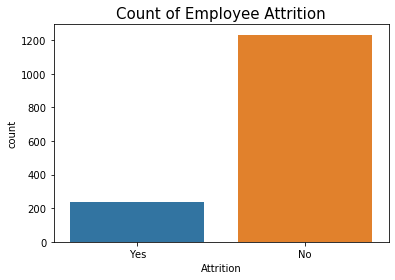

In [11]:
# Plot the Employee Attrition
sns.countplot(employee_attrition_data.Attrition)
plt.title("Count of Employee Attrition",fontsize=15)

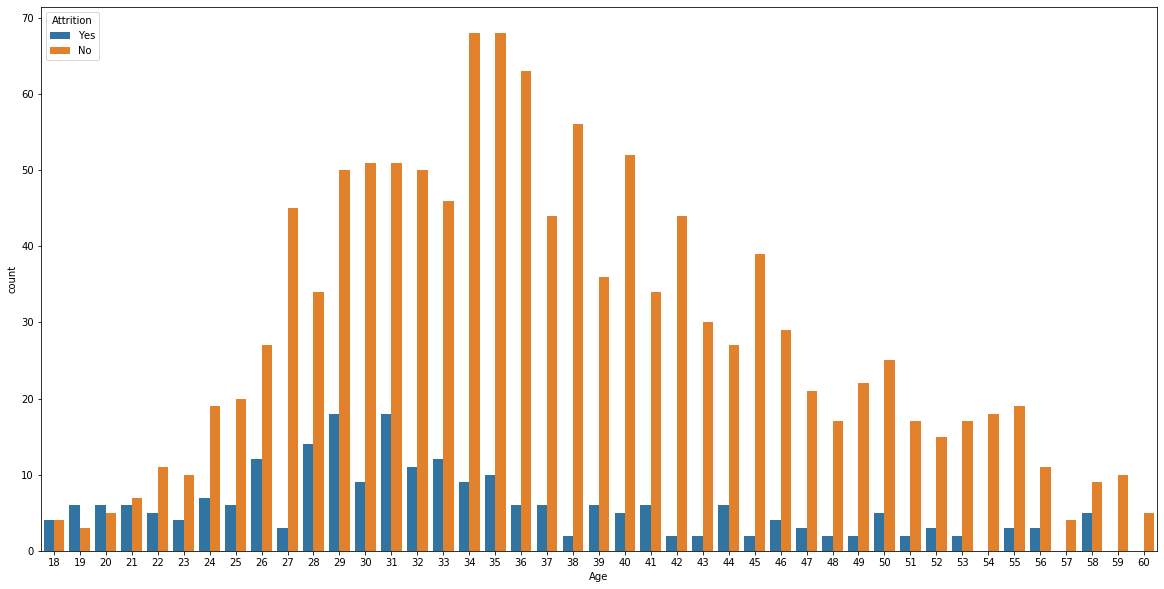

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(employee_attrition_data['Age'],hue=employee_attrition_data['Attrition'])
plt.show()

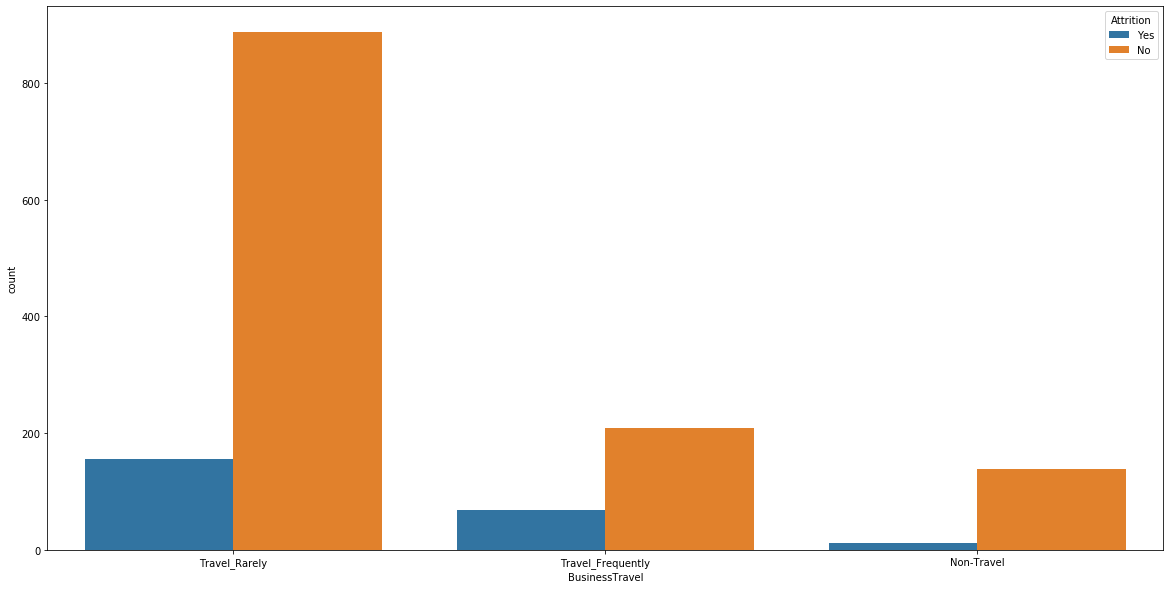

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(employee_attrition_data['BusinessTravel'],hue=employee_attrition_data['Attrition'])
plt.show()

- Employees who travel a lot are more likely to change job as compared to others.

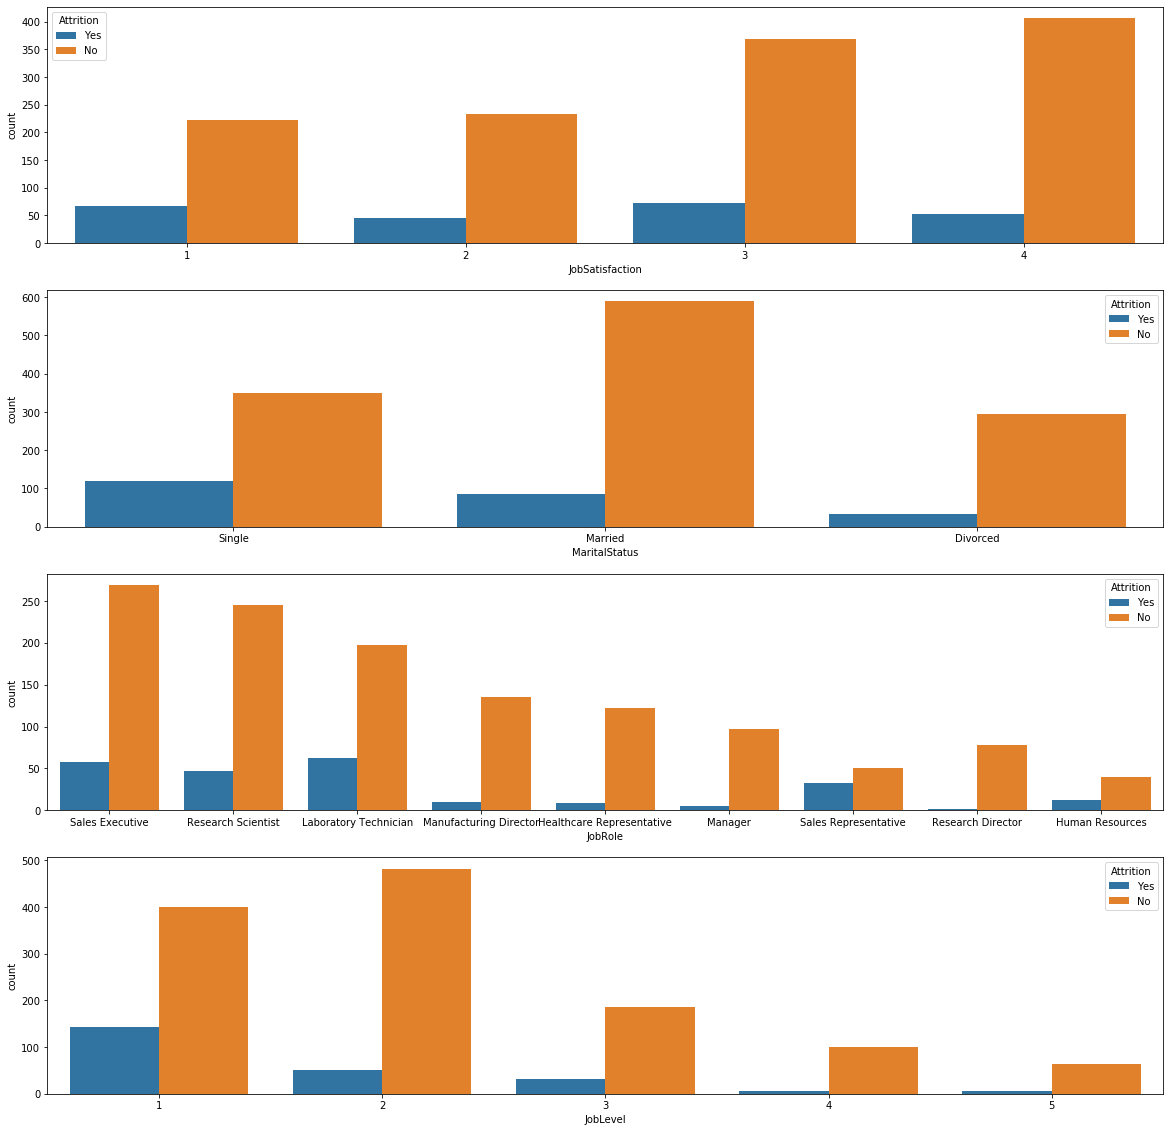

In [14]:
plt.figure(figsize=[20,20])

plt.subplot(411)
sns.countplot(x=employee_attrition_data['JobSatisfaction'],hue=employee_attrition_data['Attrition'])
plt.subplot(412)
sns.countplot(x=employee_attrition_data['MaritalStatus'],hue=employee_attrition_data['Attrition'])
plt.subplot(413)
sns.countplot(x=employee_attrition_data['JobRole'],hue=employee_attrition_data['Attrition'])
plt.subplot(414)
sns.countplot(x=employee_attrition_data['JobLevel'],hue=employee_attrition_data["Attrition"])

plt.show()

- Employees with less Job Satisfaction are more likely to leave.
- Employees who are not married are more like to leave.
- Employees from the Human Resource department are more likely to leave as compared to other departments.
- Employees with JobLevel 1 are more likely to leave.

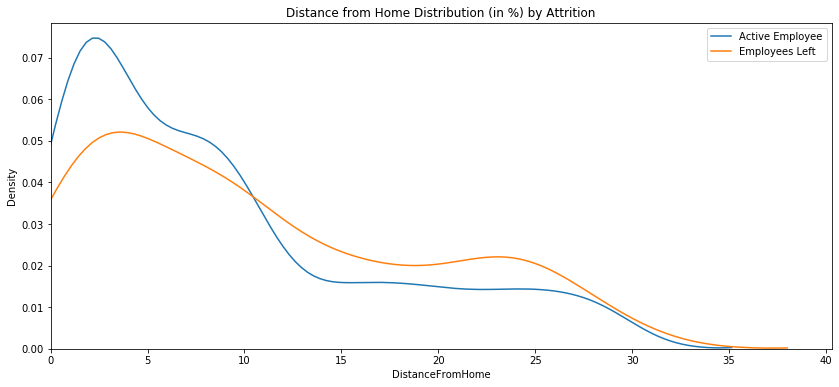

In [15]:
plt.figure(figsize=(14,6))
sns.kdeplot(employee_attrition_data.loc[employee_attrition_data['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(employee_attrition_data.loc[employee_attrition_data['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Employees Left')
plt.xlabel('DistanceFromHome')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Distance from Home Distribution (in %) by Attrition');
leg = plt.legend()

- Employees traveling more than 10 miles are more likely to leave.

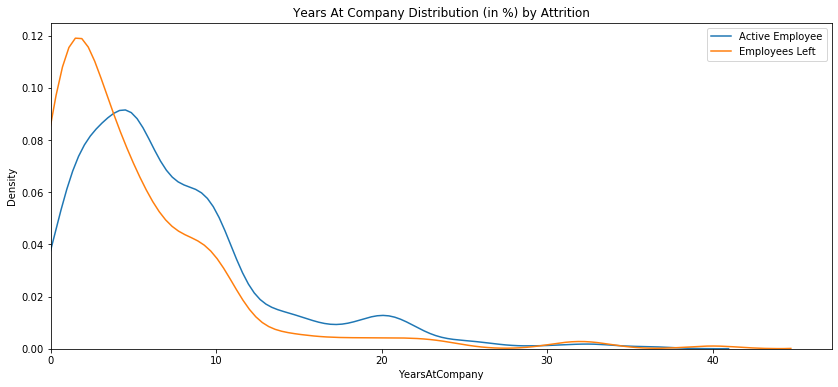

In [16]:
plt.figure(figsize=(14,6))
sns.kdeplot(employee_attrition_data.loc[employee_attrition_data['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee')
sns.kdeplot(employee_attrition_data.loc[employee_attrition_data['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Employees Left')
plt.xlabel('YearsAtCompany')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years At Company Distribution (in %) by Attrition');
leg = plt.legend()

- Employees are more likely to leave in the initial couple of years at the company.

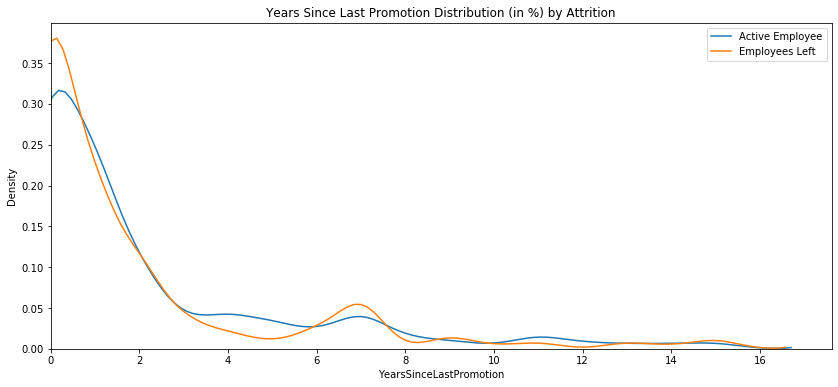

In [17]:
plt.figure(figsize=(14,6))
sns.kdeplot(employee_attrition_data.loc[employee_attrition_data['Attrition'] == 'No', 'YearsSinceLastPromotion'], label = 'Active Employee')
sns.kdeplot(employee_attrition_data.loc[employee_attrition_data['Attrition'] == 'Yes', 'YearsSinceLastPromotion'], label = 'Employees Left')
plt.xlabel('YearsSinceLastPromotion')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years Since Last Promotion Distribution (in %) by Attrition');
leg = plt.legend()

- Promotion does not show a large effect on Attrition. The distribution is very similar

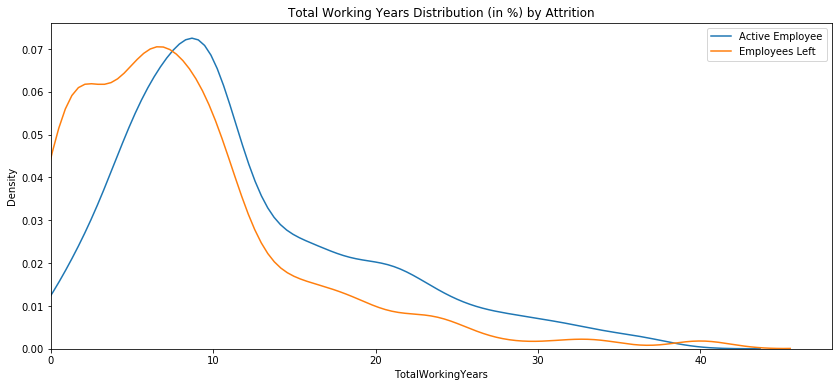

In [18]:
plt.figure(figsize=(14,6))
sns.kdeplot(employee_attrition_data.loc[employee_attrition_data['Attrition'] == 'No', 'TotalWorkingYears'], label = 'Active Employee')
sns.kdeplot(employee_attrition_data.loc[employee_attrition_data['Attrition'] == 'Yes', 'TotalWorkingYears'], label = 'Employees Left')
plt.xlabel('TotalWorkingYears')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Total Working Years Distribution (in %) by Attrition');
leg = plt.legend()

- Employees at the early stage in work profile are more likely to leave (less than 7 years experience). Also after 40 years as well.

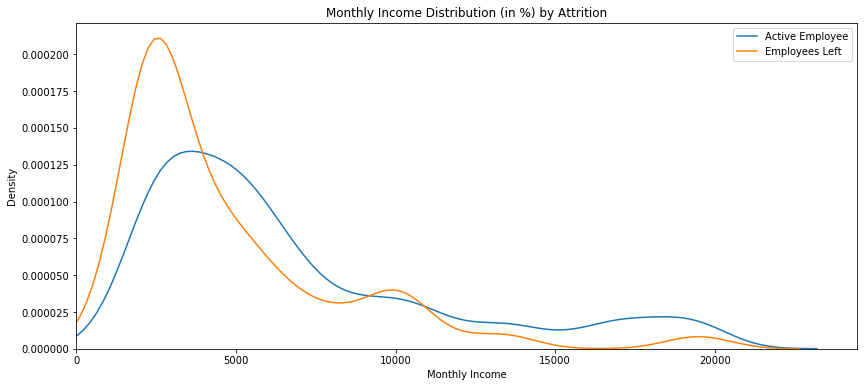

In [19]:
plt.figure(figsize=(14,6))
sns.kdeplot(employee_attrition_data.loc[employee_attrition_data['Attrition'] == 'No', 'MonthlyIncome'], label = 'Active Employee')
sns.kdeplot(employee_attrition_data.loc[employee_attrition_data['Attrition'] == 'Yes', 'MonthlyIncome'], label = 'Employees Left')
plt.xlabel('Monthly Income')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Monthly Income Distribution (in %) by Attrition');
leg = plt.legend()

- Employees with monthly income of less than 5,000 are more likely to leave.

[Text(0, 0, 'Life Sciences'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Medical'),
 Text(0, 0, 'Marketing'),
 Text(0, 0, 'Technical Degree'),
 Text(0, 0, 'Human Resources')]

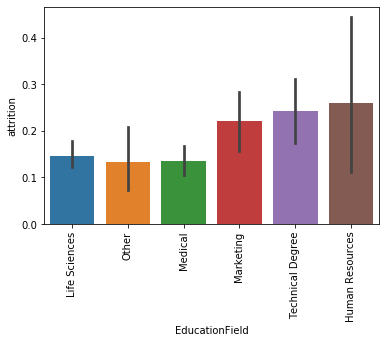

In [20]:
# EducationField vs Attrition
at = pd.DataFrame(employee_attrition_data.Attrition.astype("category").cat.codes)
at.columns = ['attrition']
a = sns.barplot(data=employee_attrition_data, x='EducationField', y=at['attrition'])
a.set_xticklabels(a.get_xticklabels(), rotation=90)

- Employees with education level Human Resources are more likely to change job.

[Text(0, 0, 'Yes'), Text(0, 0, 'No')]

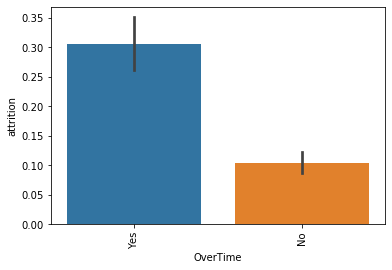

In [21]:
# OverTime vs Attrition
a = sns.barplot(data=employee_attrition_data, x='OverTime', y=at['attrition'])
a.set_xticklabels(a.get_xticklabels(), rotation=90)

- Employees who do overtime are more likely to leave.

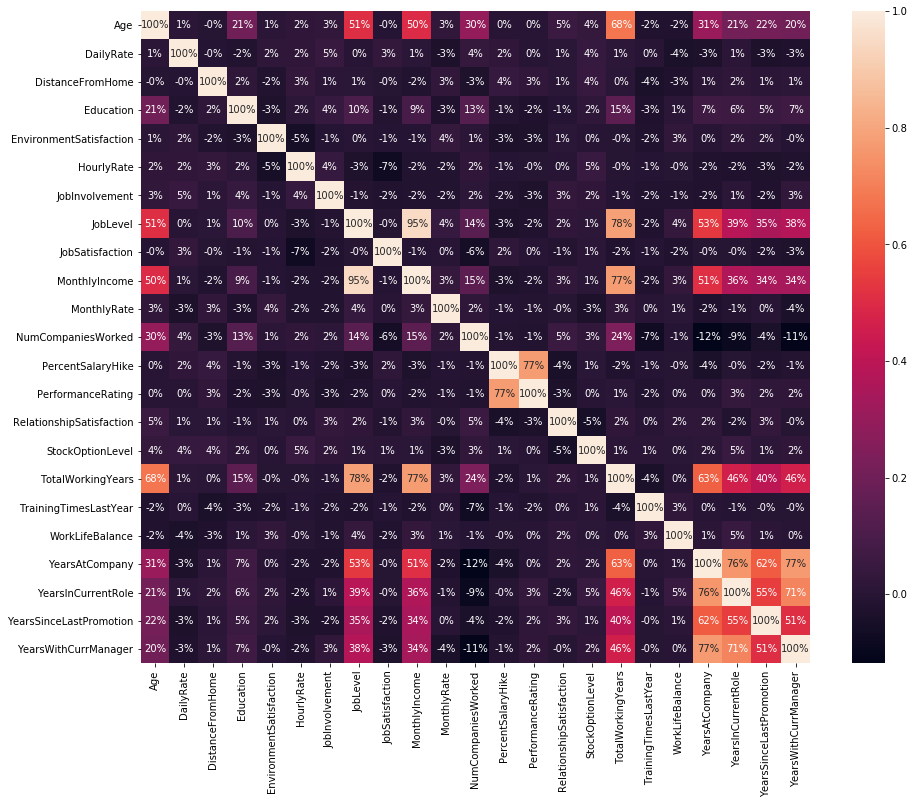

In [22]:
# Pearson Correlation Heatmap
plt.subplots(figsize=(15,12))
sns.heatmap(employee_attrition_data.corr(method = 'pearson'), annot=True, fmt='.0%')

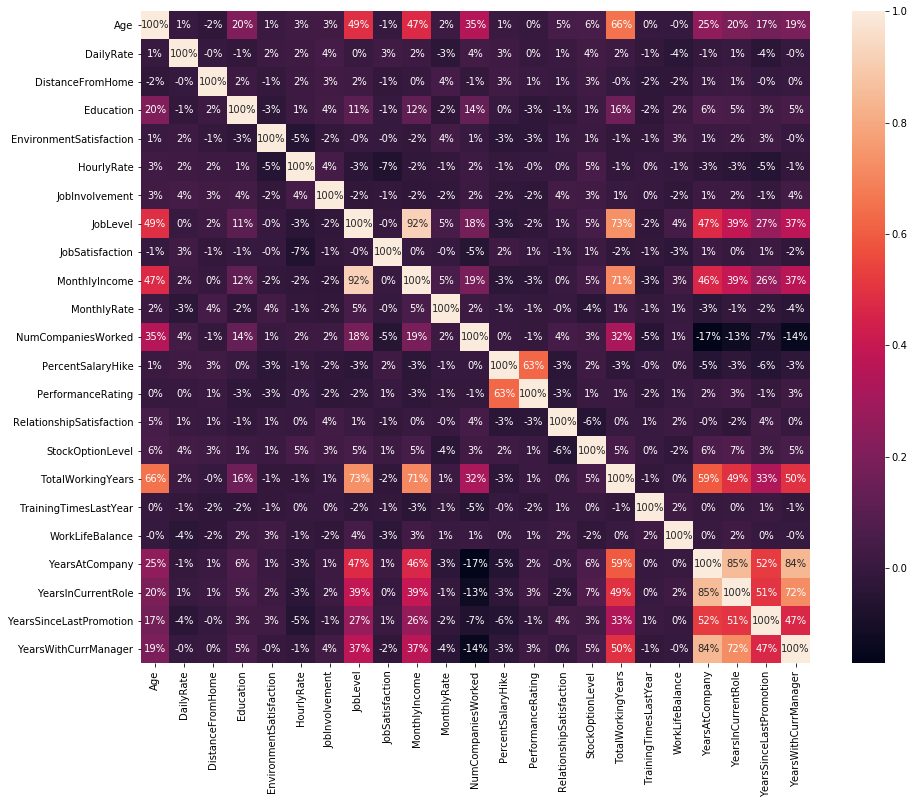

In [23]:
# Spearman Correlation Heatmap
plt.subplots(figsize=(15,12))
sns.heatmap(employee_attrition_data.corr(method = 'spearman'), annot=True, fmt='.0%')

### Train and Test

In [24]:
# Update the data in Attrition column, by changing value of Yes to 1 and No to 0
employee_attrition_data['Attrition'].replace({'Yes': 1, 'No': 0}, inplace = True)

In [25]:
# Update the data in BusinessTravel column, by changing value of Non-Travel to 0, Travel_Rarely to 1 and Travel_Frequently to 2
employee_attrition_data['BusinessTravel'].replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}, inplace = True)

In [26]:
# Update the data in Department column, by changing value of Sales to 0, Research & Development to 1 and Human Resources to 2
employee_attrition_data['Department'].replace({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}, inplace = True)

In [27]:
# Update the data in EducationField column, by changing value of Life Sciences to 0, Medical to 1, Marketing to 2, Technical Degree to 3, Human Resources to 4 and Other to 5
employee_attrition_data['EducationField'].replace({'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Human Resources': 4, 'Other': 5}, inplace = True)

In [28]:
# Update the data in Gender column, by changing value of Male to 1 and Female to 0
employee_attrition_data['Gender'].replace({'Male': 1, 'Female': 0}, inplace = True)

In [29]:
# Update the data in OverTime column, by changing value of Yes to 1 and No to 0
employee_attrition_data['OverTime'].replace({'Yes': 1, 'No': 0}, inplace = True)

In [30]:
# Update the data in MaritalStatus column, by changing value of Single to 0, Married to 1 and Divorced to 2
employee_attrition_data['MaritalStatus'].replace({'Single': 0, 'Married': 1, 'Divorced': 2}, inplace = True)

In [31]:
# Update the data in JobRole column, by changing value of Sales Executive to 0, Research Scientist to 1, Laboratory Technician to 2, Manufacturing Director to 3, Healthcare Representative to 4, Manager to 5, Sales Representative to 6, Research Director to 7 and Human Resources to 8
employee_attrition_data['JobRole'].replace({'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8}, inplace = True)

In [32]:
# Train and test data
x=employee_attrition_data.drop(columns=["Attrition"],axis="columns")
y=employee_attrition_data.Attrition

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [34]:
# Details of training dataset
print("Transaction Number x_train dataset: ", x_train.shape)
print("Transaction Number y_train dataset: ", y_train.shape)
print("Transaction Number x_test dataset: ", x_test.shape)
print("Transaction Number y_test dataset: ", y_test.shape)
print("Counts of label '1': {}".format(sum(y_train==1)))
print("Counts of label '0': {} \n".format(sum(y_train==0)))

Transaction Number x_train dataset:  (1029, 30)
Transaction Number y_train dataset:  (1029,)
Transaction Number x_test dataset:  (441, 30)
Transaction Number y_test dataset:  (441,)
Counts of label '1': 176
Counts of label '0': 853 



In [35]:
# Feature selection using Variance Threshold with threshold of 0.5
var = VarianceThreshold(threshold=.5)
var.fit(x_train,y_train)
x_train_var=var.transform(x_train)
x_test_var=var.transform(x_test)

In [36]:
x_train_var.shape

(1029, 24)

In [37]:
# Alternate way to perform feature selection and display the features
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [38]:
variance_threshold_selector(x_train, 0.5)

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,...,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
714,50,1126,1,2,1,4,66,3,4,7,...,9,22,3,1,32,1,5,4,1,3
135,36,216,6,2,1,2,84,3,2,3,...,6,20,4,2,7,0,3,2,0,1
1271,21,337,7,1,2,2,31,3,1,6,...,1,13,2,0,1,3,1,0,1,0
477,50,1246,3,3,1,1,99,3,5,5,...,1,11,3,1,32,2,32,5,10,7
806,52,994,7,4,0,2,87,3,3,4,...,7,19,4,0,18,4,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,750,28,3,0,2,46,4,2,2,...,1,17,4,2,10,3,10,9,6,8
1294,41,447,5,3,0,2,85,4,2,4,...,3,12,1,0,11,3,3,2,1,2
860,22,1256,3,4,0,3,48,2,1,1,...,0,11,2,1,1,5,0,0,0,0
1459,29,1378,13,2,5,4,46,2,2,2,...,4,13,1,1,10,2,4,3,0,3


In [39]:
varth_features=var.get_support()
varth_features

array([ True, False,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True])

Variance threshold is calculated based on probability density function of a particular distribution. If a feature has 95% or more variability then is very close to zero and the feature may not help in the model prediciton and it can be removed. The values with True are the features selected using Variance threshold technique. The columns BusinessTravel, Department, Gender, OverTime, PerformanceRating & WorkLifeBalance are removed.

In [40]:
# Feature selection using SelectKBest feature selection
skbest = SelectKBest(k=15)
skbest.fit(x_train,y_train)
x_train_skbest=skbest.transform(x_train)
x_test_skbest=skbest.transform(x_test)

In [41]:
x_train_skbest.shape

(1029, 15)

In [42]:
kbest_features=skbest.get_support()
kbest_features

array([ True,  True, False, False, False, False,  True,  True, False,
       False,  True,  True, False,  True,  True,  True, False, False,
        True, False, False, False,  True,  True, False, False,  True,
        True, False,  True])

In [43]:
# Determine 15 best features using SelectKBest
best_features = SelectKBest(score_func=f_classif, k=15)
fit = best_features.fit(x_train,y_train)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x_train.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(30,'Score'))         # print all 30 features in the order

                Feature_Name      Score
18                  OverTime  82.898389
14             MaritalStatus  50.198765
23         TotalWorkingYears  42.490621
27        YearsInCurrentRole  37.803235
11                  JobLevel  35.027917
0                        Age  34.776314
15             MonthlyIncome  31.140654
29      YearsWithCurrManager  27.173446
22          StockOptionLevel  26.475752
26            YearsAtCompany  25.088237
10            JobInvolvement  17.444769
1             BusinessTravel  14.574032
13           JobSatisfaction  10.818824
7    EnvironmentSatisfaction   7.117858
6             EducationField   6.737346
3                 Department   5.626314
4           DistanceFromHome   4.436932
17        NumCompaniesWorked   3.941519
25           WorkLifeBalance   3.052695
24     TrainingTimesLastYear   2.750407
28   YearsSinceLastPromotion   2.646695
8                     Gender   1.591793
21  RelationshipSatisfaction   1.406934
2                  DailyRate   1.201109


As per SelectKBest 'OverTime' is one of the important features. On a personal note, I feel 'OverTime' is surely an important aspect when it comes to Attrition.  
Variance Threshold Selector 'OverTime' was not one of the important features.  
Due to this I will be using SelectKBest results for training and testing of my models.  

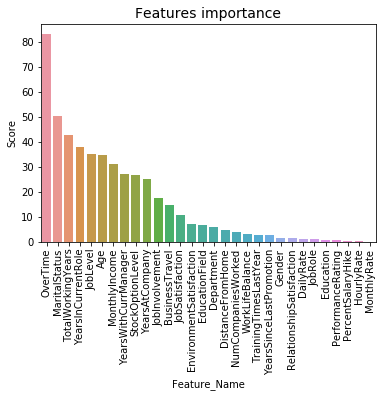

In [44]:
# Bar plot showing features in the order of score
tmp = feature_scores.sort_values(by='Score',ascending=False) 
plt.title('Features importance',fontsize=14) 
s = sns.barplot(x='Feature_Name',y='Score',data=tmp) 
s.set_xticklabels(s.get_xticklabels(),rotation=90) 
plt.show()

The values with True are the features selected using SelectKBest technique. Most relevant 15 features are selected. The features selected can be tested by running throught the model.

### Model Evaluation & Selection

In [45]:
# calculate precision recall area under curve
def preci_auc(y_true, pred_prob):
   # calculate precision-recall curve
    p, r, _ = precision_recall_curve(y_true, pred_prob)
    # calculate area under curve
    return auc(r, p)

In [46]:
# Evaluate a model
def evaluate_model(X, y, model):
    # Define evaluation procedure
    CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # Define the model evaluation the metric
    metric = make_scorer(preci_auc, needs_proba=True)
    # Evaluate model
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=CV, n_jobs=-1)
    return scores

In [47]:
# Define reference model
model = DummyClassifier(strategy='constant', constant=1)

SelectKBest returned top 15 features and we will be using this training and test data for further process 

In [48]:
# define the reference model

model = DummyClassifier(strategy='constant', constant=1)
# Evaluate the model
scores = evaluate_model(x_train_skbest, y_train, model)
# summarize performance
print('Mean area under curve: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean area under curve: 0.500 (0.000)


In [49]:
# Normalizing the data could improve the performance of the model

scaler = StandardScaler()
scaler.fit(x_train_skbest)
x_train_norm = scaler.transform(x_train_skbest)
x_test_norm = scaler.transform(x_test_skbest)

In [50]:
def model_val(X, y, classifier, scor, show):
  X = np.array(X)
  y = np.array(y)

  scores = cross_val_score(classifier, X, y, scoring=scor)

  if show == True:
    print("Score: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
  
  return scores.mean()

In [51]:
# List of models

rfc = RandomForestClassifier()
ctc = DecisionTreeClassifier()
sglc = SGDClassifier()
lr = LogisticRegression()

model = []
score = []

# Check model score
for classifier in (rfc, ctc, sglc, lr):
    model.append(classifier.__class__.__name__)
    score.append(model_val(x_train_norm, y_train, classifier, scor='roc_auc', show=True))

pd.DataFrame(data=score, index=model, columns=['roc_auc'])

Score: 0.81 (+/- 0.03)
Score: 0.64 (+/- 0.04)
Score: 0.77 (+/- 0.04)
Score: 0.82 (+/- 0.03)


,roc_auc
RandomForestClassifier,0.805351
DecisionTreeClassifier,0.637815
SGDClassifier,0.770046
LogisticRegression,0.816674


As we can see from the summary table above, the best algorithms are Random Forest Classifier and Logistic Regression for this data set.

#### Random Forest Model Evaluation

In [52]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

As the time taken to process the large dataset is more, just specified the number of estimators instead of hyperparameter grid search. 

In [53]:
parm_gridscv_rf = {'model__n_estimators': [75]}

In [54]:
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=parm_gridscv_rf, scoring='roc_auc', n_jobs=-1, 
                       pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [55]:
grid_rf.fit(x_train_norm, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring='roc_auc', verbose=1)

In [56]:
pd.DataFrame(grid_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.289664,0.043651,0.108397,0.002144,75,{'model__n_estimators': 75},0.827485,0.804929,0.788053,0.777941,0.798151,0.799312,0.016793,1


In [57]:
grid_rf.best_score_, grid_rf.best_params_

(0.79931205464642, {'model__n_estimators': 75})

#### Test Random Forest model

In [58]:
y_pred = grid_rf.predict(x_test_norm)
# Decimal places based on number of samples
dec = np.int64(np.ceil(np.log10(len(y_test))))
    
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred), '\n')
    
print('Classification report')
print(classification_report(y_test, y_pred, digits=dec))
    
print('Scalar Metrics')
format_str = '%%13s = %%.%if' % dec
if y_test.nunique() <= 2: # metrics for binary classification
    try:
        y_score = grid_rf.predict_proba(x_test_norm)[:,1]
    except:
        y_score = grid_rf.decision_function(x_test_norm)
    print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))

Confusion Matrix
[[371   9]
 [ 50  11]] 

Classification report
              precision    recall  f1-score   support

           0      0.881     0.976     0.926       380
           1      0.550     0.180     0.272        61

    accuracy                          0.866       441
   macro avg      0.716     0.578     0.599       441
weighted avg      0.835     0.866     0.836       441

Scalar Metrics
        AUROC = 0.783


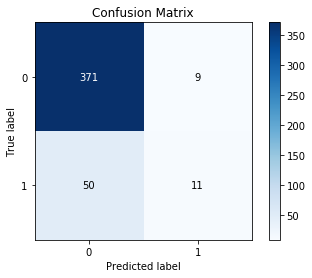

In [59]:
# Plot confusion matrix

skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [60]:
def ROC(y_test, y_prob):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

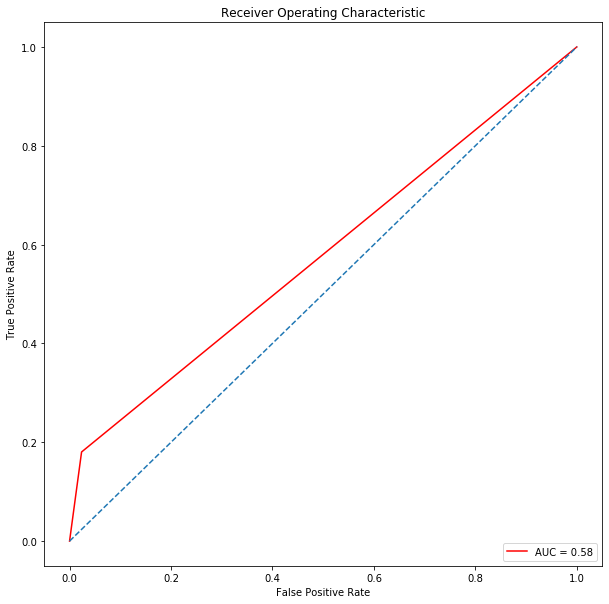

In [61]:
ROC(y_test, y_pred)

In [62]:
log_loss(y_test, y_pred)

4.62085034847302

#### Logistic Regression Model Evaluation

In [63]:
# Logistic regression model with different C values
parameters = {
    'tol': [0.00001, 0.0001, 0.001],
    'C': [1, 50, 100]
}

lgr = GridSearchCV(LogisticRegression(random_state=101, n_jobs=1, max_iter=1000),
                     param_grid=parameters,
                     cv=3,
                     n_jobs=1,
                     scoring='roc_auc'
                    )
lgr.fit(x_train_norm, y_train)
clf = lgr.best_estimator_

print(lgr.best_estimator_)
print("The best classifier score:",lgr.best_score_)

LogisticRegression(C=1, max_iter=1000, n_jobs=1, random_state=101, tol=1e-05)
The best classifier score: 0.8140231902074451


#### Test Logistic Regression Model

In [64]:
y_pred1 = clf.predict(x_test_norm)
# Decimal places based on number of samples
dec = np.int64(np.ceil(np.log10(len(y_test))))
    
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred1), '\n')
    
print('Classification report')
print(classification_report(y_test, y_pred1, digits=dec))
    
print('Scalar Metrics')
format_str = '%%13s = %%.%if' % dec
if y_test.nunique() <= 2: # metrics for binary classification
    try:
        y_score1 = clf.predict_proba(x_test_norm)[:,1]
    except:
        y_score1 = clf.decision_function(x_test_norm)
    print(format_str % ('AUROC', roc_auc_score(y_test, y_score1)))

Confusion Matrix
[[370  10]
 [ 48  13]] 

Classification report
              precision    recall  f1-score   support

           0      0.885     0.974     0.927       380
           1      0.565     0.213     0.310        61

    accuracy                          0.868       441
   macro avg      0.725     0.593     0.618       441
weighted avg      0.841     0.868     0.842       441

Scalar Metrics
        AUROC = 0.750


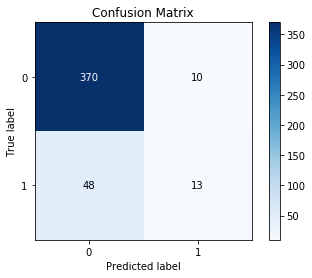

In [65]:
# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred1)

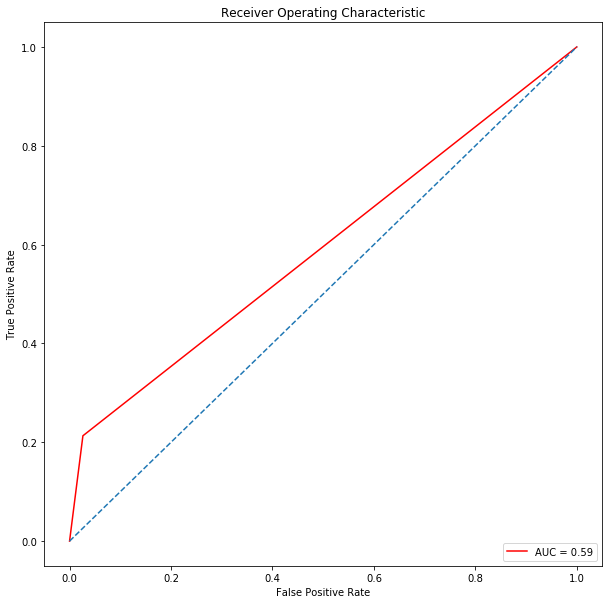

In [66]:
ROC(y_test, y_pred1)

In [67]:
log_loss(y_test, y_pred1)

4.542532940768984

### Conclusion
  
Organization's performance is heavily based on the quality of the employees. So as an organization it is important to understand the causes of employee attrition and see how the rate can be kept below a certain acceptable threshold.  

With the help of machine learning algorithms, employers will be able to predict employees who are at risk of leaving the company and also determine the factors that lead to employee attrition.  
  
- As proven by Graph Analysis and SelectKBest, ‘OverTime’ plays a major factor in employee attrition. 
- Using Random Forest Model our model will correctly predict if the employee would leave the company or not 78.3% of the time.
- Logistic Regression Model our model will correctly predict if the employee would leave the company or not 75% of the time.
- Random forest model has fewer false positives than logistic regression making it a better model.

I believe ingesting more data to machine learning model will help us get better results from what we have achieved here in our research.